In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

We look at data collected by A. Lacoste, A. Luccioni, V. Schmidt in developing their online GPU emissions calculator to determine the emissions and impact of different data center providers and hardware. This data is from:
https://github.com/mlco2/impact

In [2]:
df = pd.read_csv("./impact.csv")


In [3]:
df.head()

,provider,providerName,offsetRatio,region,regionName,country,state,city,impact,source,PUE,PUE source,comment
0,gcp,Google Cloud Platform,100,asia-east1,NaN,Taiwan,NaN,Changhua County,557.0,"measured on July 2, 2019 between 8 and 9 PM, ...",1.12,https://www.google.com/about/datacenters/effic...,Datacenter-specific
1,gcp,Google Cloud Platform,100,asia-east2,NaN,China,NaN,Hong Kong,702.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
2,gcp,Google Cloud Platform,100,asia-northeast1,NaN,Japan,NaN,Tokyo,516.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
3,gcp,Google Cloud Platform,100,asia-northeast2,NaN,Japan,NaN,Osaka,516.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN
4,gcp,Google Cloud Platform,100,asia-south1,NaN,India,NaN,Mumbai,920.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN


In [4]:
df.providerName.value_counts()

providerName
Azure                    32
Amazon Web Services      22
Google Cloud Platform    21
CoreWeave                 3
OVHCloud                  2
Scaleway                  1
Seeweb                    1
Name: count, dtype: int64

In [5]:
df.country.value_counts()

country
USA               23
Japan              6
Australia          6
France             5
Canada             5
India              5
United Kingdom     4
China              4
Singapore          3
South Korea        3
Brazil             3
Ireland            2
Germany            2
Netherlands        2
South Africa       2
Sweden             1
Hong Kong          1
Taiwan             1
Switzerland        1
Belgium            1
Finland            1
Italy              1
Name: count, dtype: int64

In [6]:
df.sort_values(by = ["impact"], inplace = True)

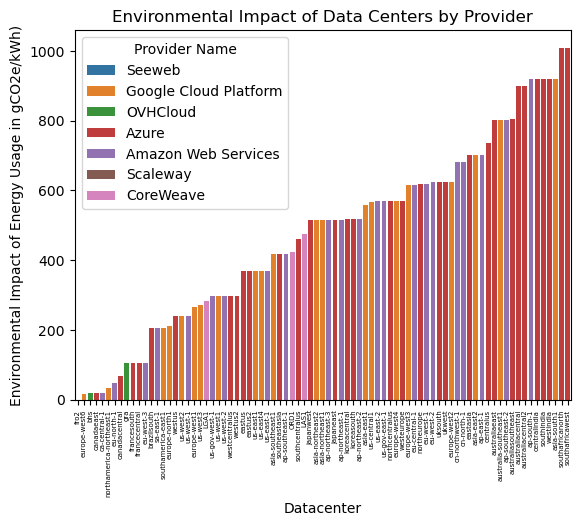

In [7]:
plt = sns.barplot(data = df, x = "region", y = "impact", hue = "providerName")
plt.tick_params(axis='x', rotation=90, labelsize = 5)
plt.set_title("Environmental Impact of Data Centers by Provider")
plt.set_ylabel("Environmental Impact of Energy Usage in gCO2e/kWh)")
plt.set_xlabel("Datacenter")
plt.legend(title = "Provider Name", loc = "best")

We realise that the Cloud provider has less of an impact on environmental costs than the country where the datacenter is located.

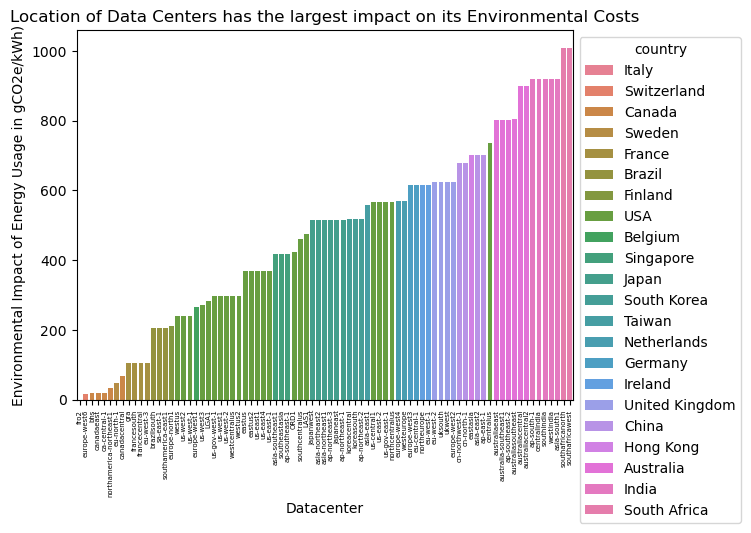

In [8]:
plt = sns.barplot(data = df, x = "region", y = "impact", hue = "country")
plt.tick_params(axis='x', rotation=90, labelsize = 5)
plt.set_title("Location of Data Centers has the largest impact on its Environmental Costs")
plt.set_ylabel("Environmental Impact of Energy Usage in gCO2e/kWh)")
plt.set_xlabel("Datacenter")
# plt.legend(title = "Provider Name", loc = "best")
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

We now look at the energy efficieny of hardware choices

In [9]:
df_gpus = pd.read_csv("./gpus.csv")


In [10]:
df_gpus["GFLOPS32/W"].isna().count()

45

In [11]:
df_gpus["GFLOPS16/W"].isna().count()

45

In [12]:
df_gpus=df_gpus[df_gpus["GFLOPS32/W"].notna()]

In [13]:
df_gpus.head()

,name,type,tdp_watts,TFLOPS32,TFLOPS16,GFLOPS32/W,GFLOPS16/W,memory,source
2,AGX Xavier,gpu,30,16.00,32.00,533.33,1066.67,NaN,https://elinux.org/Jetson_AGX_Xavier
3,AMD RX480,gpu,150,5.80,5.80,38.67,38.67,8.0,techpowerup.com
5,GTX 1080 Ti,gpu,250,11.34,0.17,45.36,0.68,11.0,techpowerup.com
6,GTX 1080,gpu,180,8.00,0.13,44.44,0.72,8.0,techpowerup.com
7,GTX 750,gpu,250,1111.00,NaN,444.40,Nan,24.0,https://www.techpowerup.com/gpu-specs/geforce-...


In [14]:
df_gpus.sort_values(by = ["GFLOPS32/W"], inplace = True, ascending = False)

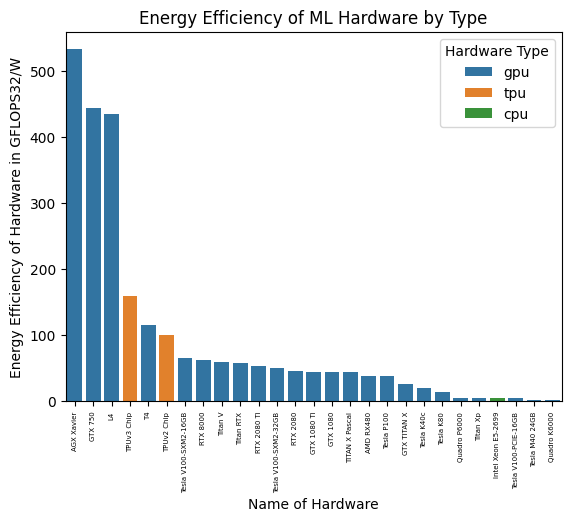

In [24]:
plt = sns.barplot(data = df_gpus, x = "name", y = "GFLOPS32/W", hue = "type")
plt.tick_params(axis='x', rotation=90, labelsize = 5)
plt.set_title("Energy Efficiency of ML Hardware by Type")
plt.set_ylabel("Energy Efficiency of Hardware in GFLOPS32/W")
plt.set_xlabel("Name of Hardware")
plt.legend(title = "Hardware Type", loc = "best")
